In [1]:
import pandas as pd

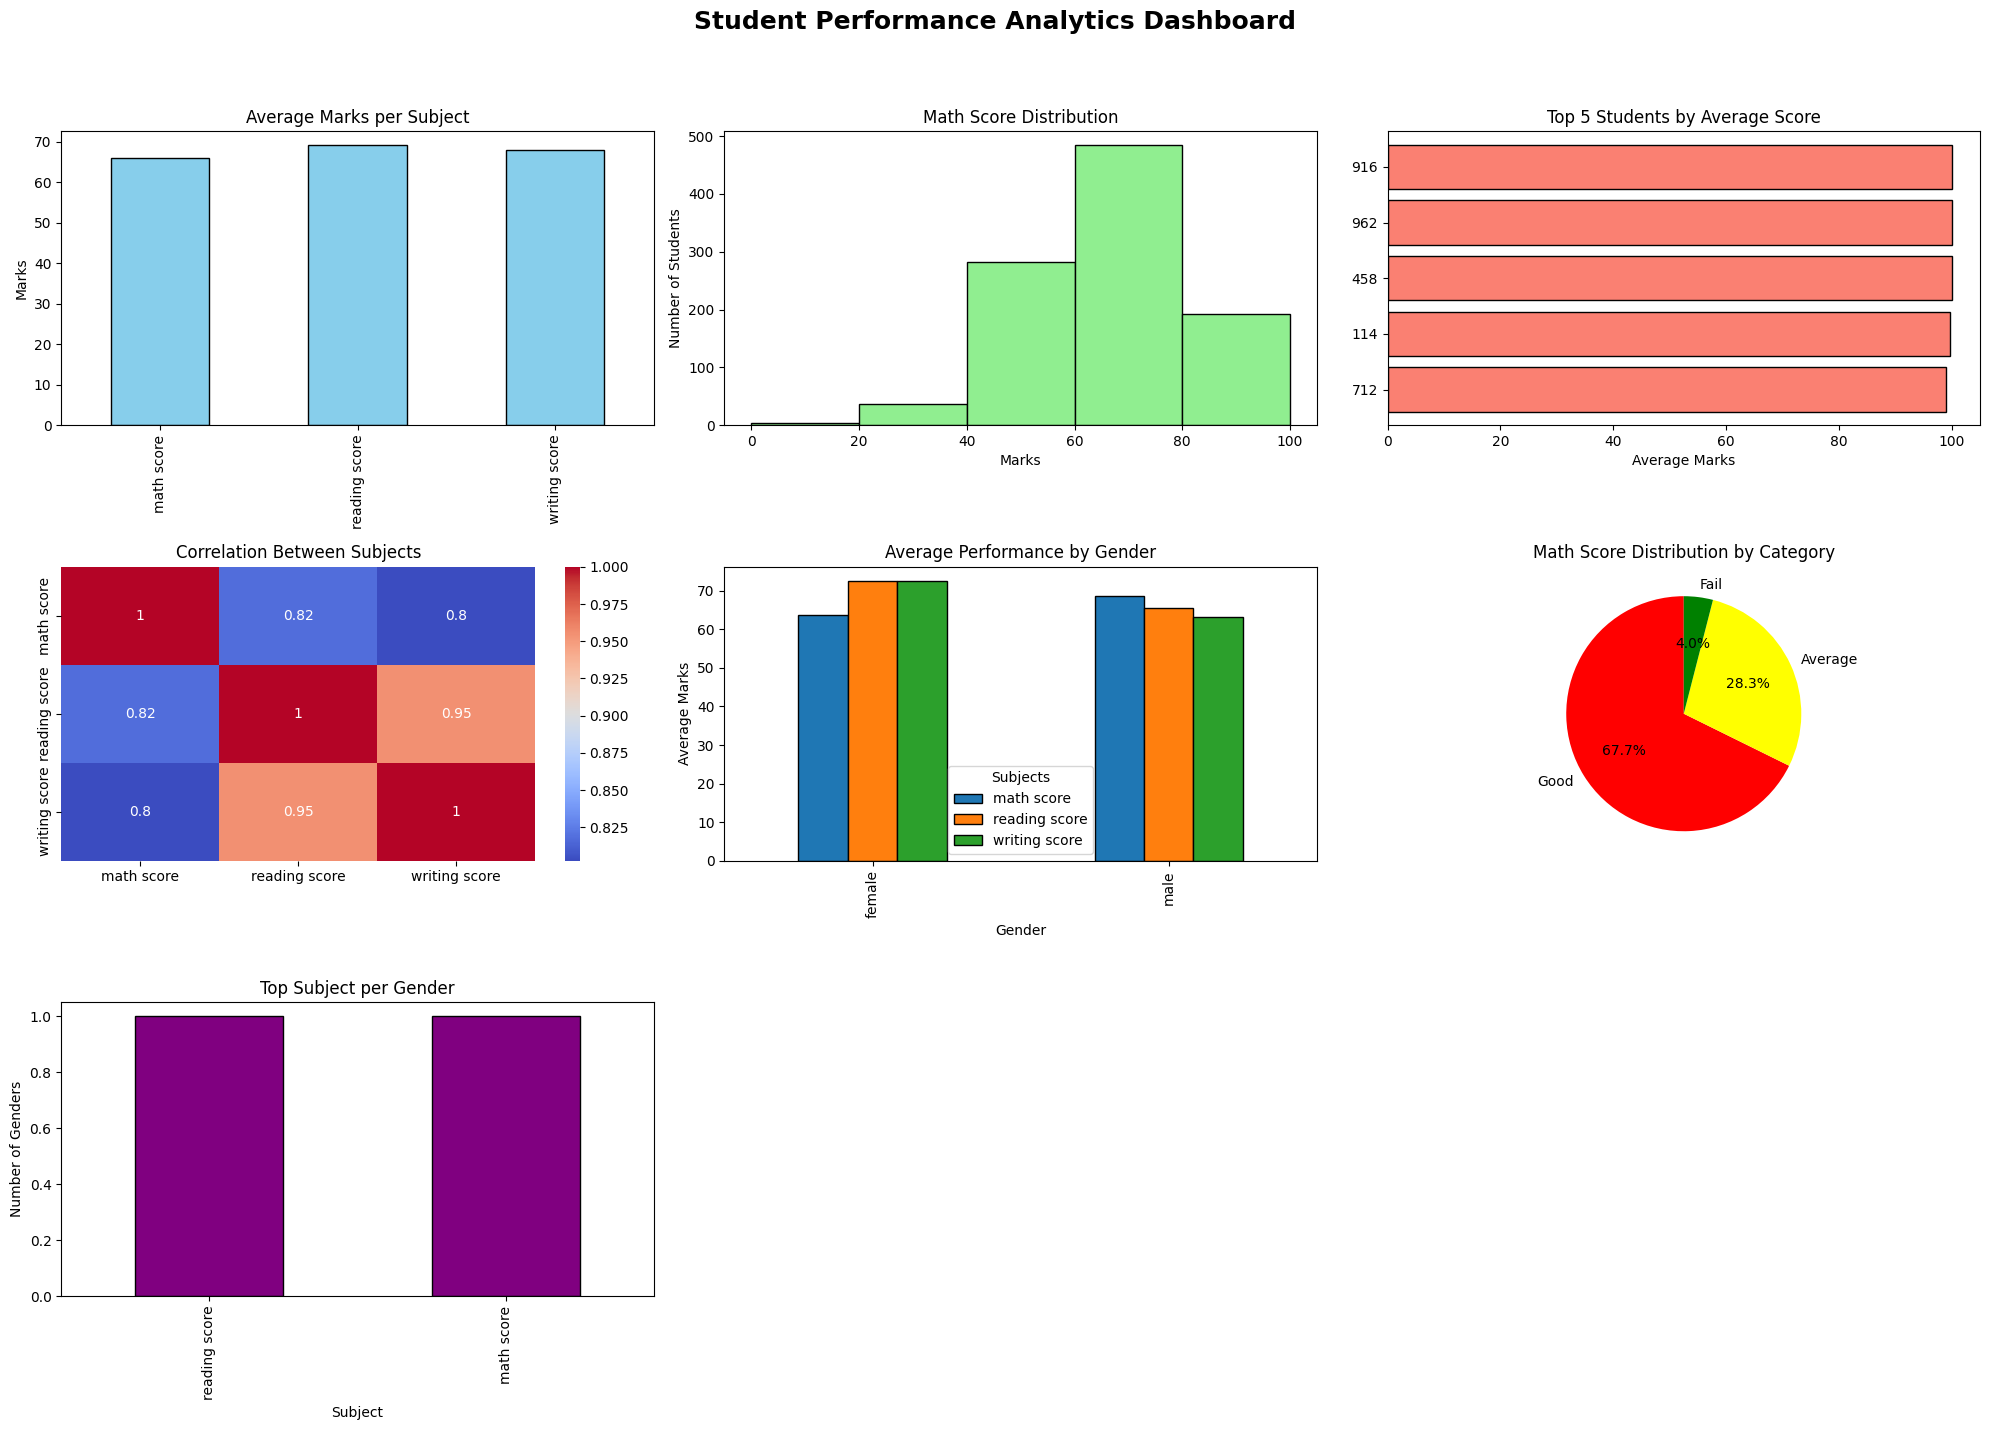

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv("StudentsPerformance.csv")  # Update path if needed

# Define subjects
subjects = ['math score', 'reading score', 'writing score']

# Calculate averages
avg_marks = df[subjects].mean()

# Calculate average per student
df['Average'] = df[subjects].mean(axis=1)
top_students = df.sort_values('Average', ascending=False).head(5)

# average marks by gender
gender_avg = df.groupby('gender')[subjects].mean()


#Subject-wise Performance Categories (Pass/Fail/Good)
def performance_category(score):
    if score < 40:
        return 'Fail'
    elif score < 60:
        return 'Average'
    else:
        return 'Good'

for subject in subjects:
    df[subject + '_Category'] = df[subject].apply(performance_category)

math_category_counts = df['math score_Category'].value_counts()


#Top Subject per Gender
top_subject_gender = gender_avg.idxmax(axis=1)

# Create figure with subplots (3 rows x 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle('Student Performance Analytics Dashboard', fontsize=18, weight='bold')

#Average marks per subject - Bar Chart
avg_marks.plot(kind='bar', ax=axs[0,0], color='skyblue', edgecolor='black')
axs[0,0].set_title('Average Marks per Subject')
axs[0,0].set_ylabel('Marks')

#Distribution of Math scores - Histogram
df['math score'].plot(kind='hist', bins=5, color='lightgreen', edgecolor='black', ax=axs[0,1])
axs[0,1].set_title('Math Score Distribution')
axs[0,1].set_xlabel('Marks')
axs[0,1].set_ylabel('Number of Students')

#Top 5 Students by Average Score - Horizontal Bar
axs[0,2].barh(top_students.index.astype(str), top_students['Average'], color='salmon', edgecolor='black')
axs[0,2].set_title('Top 5 Students by Average Score')
axs[0,2].invert_yaxis()
axs[0,2].set_xlabel('Average Marks')

#Correlation Heatmap between subjects
sns.heatmap(df[subjects].corr(), annot=True, cmap='coolwarm', ax=axs[1,0])
axs[1,0].set_title('Correlation Between Subjects')

#Student Performance by Gender - Grouped Bar Chart
gender_avg.plot(kind='bar', edgecolor='black', ax=axs[1,1])
axs[1,1].set_title('Average Performance by Gender')
axs[1,1].set_ylabel('Average Marks')
axs[1,1].set_xlabel('Gender')
axs[1,1].legend(title='Subjects')

#Math Performance Categories - Pie Chart
math_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','yellow','green'], startangle=90, ax=axs[1,2])
axs[1,2].set_title('Math Score Distribution by Category')
axs[1,2].set_ylabel('')

#Top Subject per Gender - Bar Chart
top_subject_gender.value_counts().plot(kind='bar', color='purple', edgecolor='black', ax=axs[2,0])
axs[2,0].set_title('Top Subject per Gender')
axs[2,0].set_ylabel('Number of Genders')
axs[2,0].set_xlabel('Subject')

fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
